# Query Classification Project

In [2]:
# Import Libraries

import pandas as pd
import numpy as np

In [3]:
# Import Dataset

df = pd.read_csv('final.csv')
df.head()

,Query statement,Type of Query
0,Road with two footpaths,Attribute
1,Display roads with atleast 3 speed breakers.,Attribute
2,Roads with no cycle tracks.,Attribute
3,Display all the primary roads.,Attribute
4,Which roads have a minimum width of 7 meter,Attribute


In [4]:
df.shape

(920, 2)

In [5]:
df.isnull().sum()

Query statement    0
Type of Query      0
dtype: int64

In [6]:
df.describe()

,Query statement,Type of Query
count,920,920
unique,561,3
top,"List all the signals whose name ends with ""P""",Attribute
freq,6,472


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Query statement  920 non-null    object
 1   Type of Query    920 non-null    object
dtypes: object(2)
memory usage: 14.5+ KB


In [8]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website

# 1. Data Cleaning

In [9]:
# Renaming the columns

df.rename(columns={'Type of Query':'target','Query statement':'text'},inplace = True)


In [10]:
df.head()

,text,target
0,Road with two footpaths,Attribute
1,Display roads with atleast 3 speed breakers.,Attribute
2,Roads with no cycle tracks.,Attribute
3,Display all the primary roads.,Attribute
4,Which roads have a minimum width of 7 meter,Attribute


In [11]:
df.target.unique()

array(['Attribute', 'Spatial ', 'Spatial and Attribute'], dtype=object)

In [12]:
# Convert Target Columns into Labels

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df

,text,target
0,Road with two footpaths,0
1,Display roads with atleast 3 speed breakers.,0
2,Roads with no cycle tracks.,0
3,Display all the primary roads.,0
4,Which roads have a minimum width of 7 meter,0
...,...,...
915,What pipes do not cross the roads and have a l...,2
916,Sample 1 km of SVP hospital firefighters,2
917,It shows all the schools that are 100 m from M...,2
918,"Filter all restaurants in ""Ahmedabad-Baroda Ex...",2


In [13]:
df.shape

(920, 2)

In [14]:
df.duplicated().sum()

358

In [15]:
# Drop Duplicate Records

df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(562, 2)

# 2. EDA

In [17]:
df['target'].value_counts()

0    272
1    175
2    115
Name: target, dtype: int64

In [18]:
import matplotlib.pyplot as plt

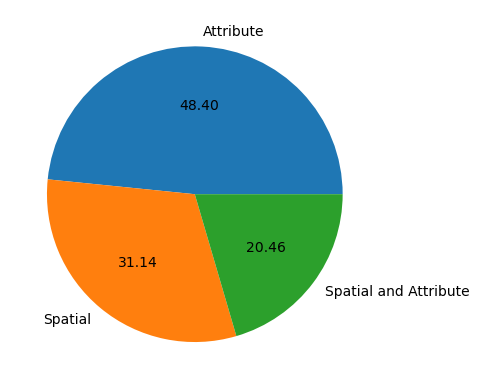

In [19]:
plt.pie(df['target'].value_counts(), labels=['Attribute','Spatial','Spatial and Attribute'],autopct="%0.2f")
plt.show()

In [20]:
# Now We Extract Number OF Character / Number Of Words / Number Of Sentances

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kathan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Number of Character

df['num_char']=df['text'].apply(len)

In [24]:
# Number Of Words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
# Number of Sentences 

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df

,text,target,num_char,num_words,num_sentences
0,Road with two footpaths,0,23,4,1
1,Display roads with atleast 3 speed breakers.,0,44,8,1
2,Roads with no cycle tracks.,0,27,6,1
3,Display all the primary roads.,0,30,6,1
4,Which roads have a minimum width of 7 meter,0,43,9,1
...,...,...,...,...,...
888,Private Arses is at less than 500 m from the m...,2,55,12,1
897,500 m of the main fire,2,22,6,1
910,Show the case of all Shahibaug neighborhood ro...,2,103,19,1
912,Shows all water pipes in the ghatody of the ro...,2,104,22,1


In [27]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,562.000000,562.000000,562.0
mean,58.341637,11.676157,1.0
std,18.314854,3.844820,0.0
min,18.000000,4.000000,1.0
25%,44.000000,9.000000,1.0
50%,55.500000,11.000000,1.0
75%,70.000000,14.000000,1.0
max,113.000000,25.000000,1.0


In [28]:
# Attribute

df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,272.000000,272.000000,272.0
mean,54.415441,11.378676,1.0
std,17.381338,3.806189,0.0
min,18.000000,4.000000,1.0
25%,41.750000,9.000000,1.0
50%,51.000000,11.000000,1.0
75%,67.250000,14.000000,1.0
max,97.000000,22.000000,1.0


In [29]:
# Spatial

df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,175.000000,175.000000,175.0
mean,55.897143,10.582857,1.0
std,15.267377,3.151855,0.0
min,24.000000,4.000000,1.0
25%,45.000000,8.000000,1.0
50%,55.000000,10.000000,1.0
75%,64.500000,12.500000,1.0
max,107.000000,21.000000,1.0


In [30]:
# Spatial & Attribute

df[df['target'] == 2][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,115.000000,115.000000,115.0
mean,71.347826,14.043478,1.0
std,18.977384,3.930071,0.0
min,22.000000,6.000000,1.0
25%,55.500000,11.000000,1.0
50%,72.000000,14.000000,1.0
75%,85.000000,17.000000,1.0
max,113.000000,25.000000,1.0


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

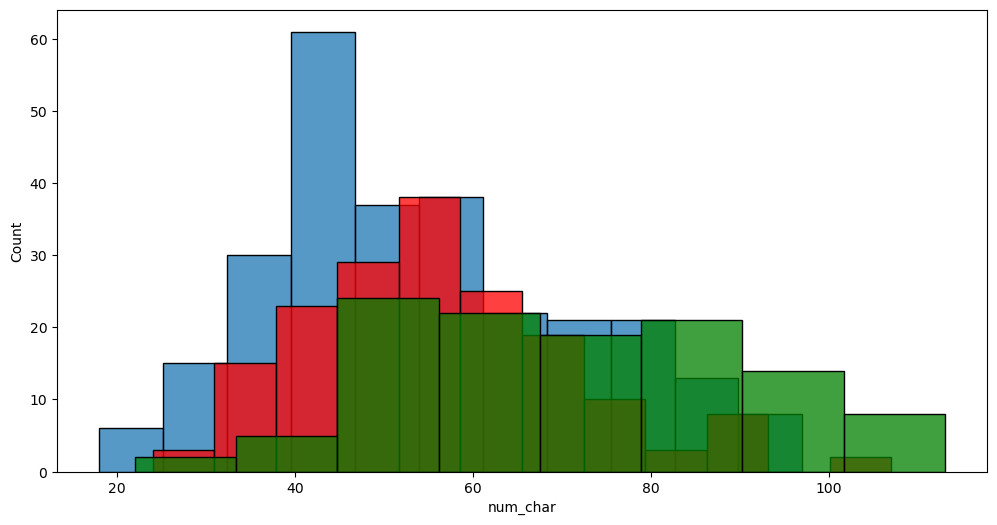

In [32]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color = 'red')
sns.histplot(df[df['target']==2]['num_char'],color = 'green')

<AxesSubplot:>

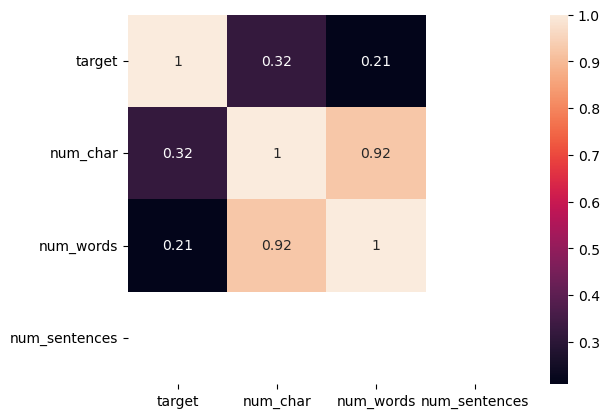

In [33]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

- Change all words into lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [34]:
# see all stopwords

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# see all punctuations

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
ps.stem("How are you buddy")

'how are you buddi'

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [39]:
transform_text("Display roads with atleast 3 speed breakers.")

'display road atleast 3 speed breaker'

In [40]:
# Apply function in whole dataset and add a new column 

df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,text,target,num_char,num_words,num_sentences,transformed_text
0,Road with two footpaths,0,23,4,1,road two footpath
1,Display roads with atleast 3 speed breakers.,0,44,8,1,display road atleast 3 speed breaker
2,Roads with no cycle tracks.,0,27,6,1,road cycl track
3,Display all the primary roads.,0,30,6,1,display primari road
4,Which roads have a minimum width of 7 meter,0,43,9,1,road minimum width 7 meter


In [42]:
# Import WordCloud To Find Most Repeating Words

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

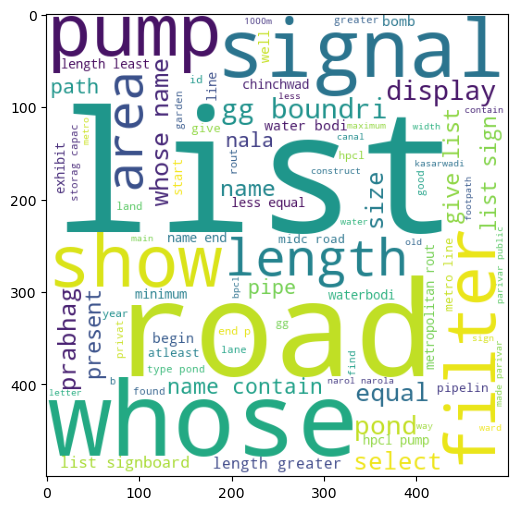

In [43]:
attribute_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) # 0 - Attribute
plt.figure(figsize=(12,6))

plt.imshow(attribute_wc)

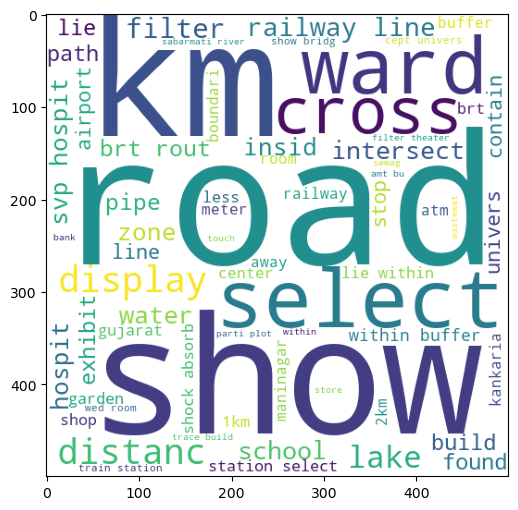

In [44]:
spatial_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) # 1 - Spatial
plt.figure(figsize=(12,6))

plt.imshow(spatial_wc)

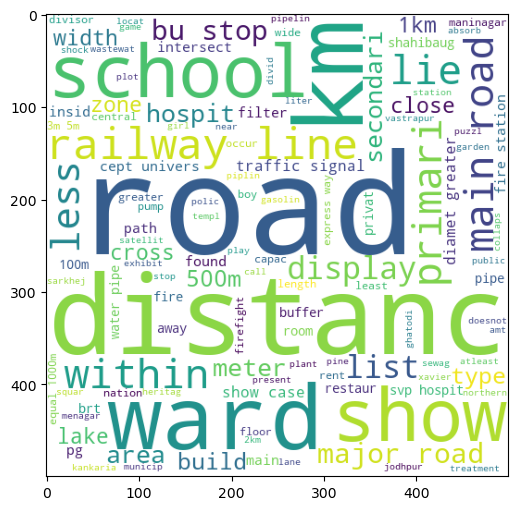

In [45]:
spatial_attribute_wc = wc.generate(df[df['target'] == 2]['transformed_text'].str.cat(sep=" ")) # 1 - Spatial

plt.figure(figsize=(12,6))
plt.imshow(spatial_attribute_wc)

# Top 15 words used in Attribute Spatial & Spatial And Attribute

In [46]:
df[df['target'] == 0]['transformed_text'].tolist()

['road two footpath',
 'display road atleast 3 speed breaker',
 'road cycl track',
 'display primari road',
 'road minimum width 7 meter',
 'road 2 culvert atleast 1 divid',
 'road maximum 2 speedbreak',
 'display road width 3m footpath',
 'display road danilimda ward',
 'display road either culvert footpath',
 'show road minimum 500 length 2 lane',
 'display road primari categori',
 'display secondari road traffic signal',
 'show tar road 2 lane',
 'display roda 5 km length',
 'list road whose name start',
 'list road whose name end p',
 'display road construct 19th octob 2021',
 'showcas road whose length lie 400m 1000m',
 'road signal footpath',
 'show primari road construct 20th novemebr 2021 31st decemb 2021',
 'road 2 3 divid',
 'signal name 11 2',
 'display signal road',
 'display signal name contain wd',
 'list signal whose name start',
 'list signal whose name end p',
 'list well greater 1200',
 'list well tbg less equal',
 'display well statu equal',
 'show well whose betweem

In [47]:
# loop for extract attribute words

attribute_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        attribute_corpus.append(word)

In [48]:
attribute_corpus

['road',
 'two',
 'footpath',
 'display',
 'road',
 'atleast',
 '3',
 'speed',
 'breaker',
 'road',
 'cycl',
 'track',
 'display',
 'primari',
 'road',
 'road',
 'minimum',
 'width',
 '7',
 'meter',
 'road',
 '2',
 'culvert',
 'atleast',
 '1',
 'divid',
 'road',
 'maximum',
 '2',
 'speedbreak',
 'display',
 'road',
 'width',
 '3m',
 'footpath',
 'display',
 'road',
 'danilimda',
 'ward',
 'display',
 'road',
 'either',
 'culvert',
 'footpath',
 'show',
 'road',
 'minimum',
 '500',
 'length',
 '2',
 'lane',
 'display',
 'road',
 'primari',
 'categori',
 'display',
 'secondari',
 'road',
 'traffic',
 'signal',
 'show',
 'tar',
 'road',
 '2',
 'lane',
 'display',
 'roda',
 '5',
 'km',
 'length',
 'list',
 'road',
 'whose',
 'name',
 'start',
 'list',
 'road',
 'whose',
 'name',
 'end',
 'p',
 'display',
 'road',
 'construct',
 '19th',
 'octob',
 '2021',
 'showcas',
 'road',
 'whose',
 'length',
 'lie',
 '400m',
 '1000m',
 'road',
 'signal',
 'footpath',
 'show',
 'primari',
 'road',
 'con

In [49]:
len(attribute_corpus)

1578

In [50]:
# Count Of Attribute Words

from collections import Counter
Counter(attribute_corpus).most_common()

[('list', 139),
 ('road', 69),
 ('whose', 54),
 ('name', 47),
 ('length', 42),
 ('pump', 37),
 ('signal', 34),
 ('show', 28),
 ('filter', 25),
 ('2', 24),
 ('area', 24),
 ('gg', 24),
 ('equal', 23),
 ('pond', 21),
 ('give', 19),
 ('line', 19),
 ('boundri', 19),
 ('display', 17),
 ('500', 17),
 ('contain', 15),
 ('greater', 15),
 ('sign', 15),
 ('hpcl', 14),
 ('prabhag', 14),
 ('size', 14),
 ('rout', 14),
 ('select', 14),
 ('1000', 13),
 ('water', 13),
 ('less', 12),
 ('present', 12),
 ('bodi', 12),
 ('end', 11),
 ('signboard', 11),
 ('metro', 11),
 ('least', 11),
 ('2000', 10),
 ('nala', 10),
 ('path', 10),
 ('pipe', 10),
 ('well', 9),
 ('type', 9),
 ('begin', 9),
 ('bomb', 9),
 ('minimum', 8),
 ('1', 8),
 ('start', 8),
 ('construct', 8),
 ('chinchwad', 8),
 ('made', 8),
 ('waterbodi', 8),
 ('exhibit', 8),
 ('metropolitan', 8),
 ('atleast', 7),
 ('3', 7),
 ('2021', 7),
 ('15', 7),
 ('midc', 7),
 ('pipelin', 7),
 ('100', 7),
 ('p', 6),
 ('11', 6),
 ('narol', 6),
 ('year', 6),
 ('highway

In [51]:
pd.DataFrame(Counter(attribute_corpus).most_common())

,0,1
0,list,139
1,road,69
2,whose,54
3,name,47
4,length,42
...,...,...
240,ground,1
241,locat,1
242,approxim,1
243,mi,1


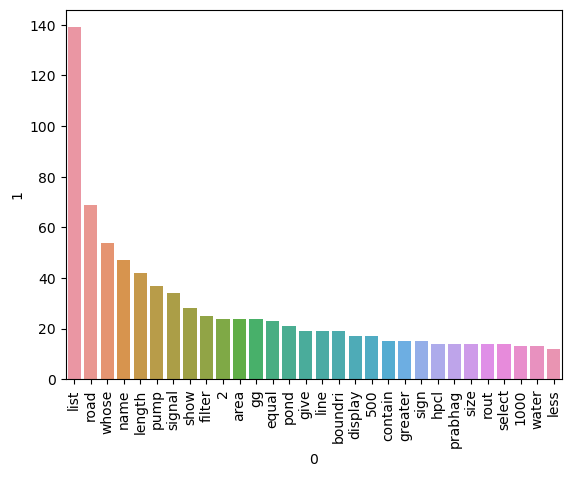

In [52]:
# plot top 15 words 

sns.barplot(pd.DataFrame(Counter(attribute_corpus).most_common(30))[0],pd.DataFrame(Counter(attribute_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [53]:
# loop for extract spatial words

spatial_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spatial_corpus.append(word)

In [54]:
len(spatial_corpus)

1024

In [55]:
# Count Of spatial Words

from collections import Counter
Counter(spatial_corpus).most_common()

[('road', 51),
 ('show', 46),
 ('km', 40),
 ('select', 39),
 ('ward', 31),
 ('cross', 26),
 ('display', 24),
 ('distanc', 23),
 ('hospit', 20),
 ('line', 19),
 ('filter', 18),
 ('within', 17),
 ('railway', 17),
 ('lake', 17),
 ('brt', 15),
 ('lie', 14),
 ('2', 14),
 ('1', 14),
 ('buffer', 12),
 ('univers', 12),
 ('build', 12),
 ('intersect', 11),
 ('school', 11),
 ('500', 11),
 ('water', 11),
 ('5', 11),
 ('svp', 10),
 ('zone', 10),
 ('insid', 10),
 ('room', 10),
 ('rout', 9),
 ('pipe', 9),
 ('station', 8),
 ('exhibit', 8),
 ('path', 8),
 ('found', 8),
 ('stop', 7),
 ('airport', 7),
 ('contain', 7),
 ('wastewat', 7),
 ('wed', 7),
 ('200', 6),
 ('less', 6),
 ('1km', 6),
 ('bu', 6),
 ('100', 6),
 ('shop', 6),
 ('gujarat', 6),
 ('garden', 6),
 ('shock', 6),
 ('absorb', 6),
 ('2km', 5),
 ('pass', 5),
 ('kankaria', 5),
 ('away', 5),
 ('cept', 5),
 ('maninagar', 5),
 ('boundari', 5),
 ('amt', 5),
 ('atm', 5),
 ('center', 5),
 ('bridg', 5),
 ('parti', 5),
 ('meter', 5),
 ('train', 5),
 ('touc

In [56]:
pd.DataFrame(Counter(spatial_corpus).most_common())

,0,1
0,road,51
1,show,46
2,km,40
3,select,39
4,ward,31
...,...,...
189,side,1
190,batteri,1
191,frame,1
192,vrasastrapur,1


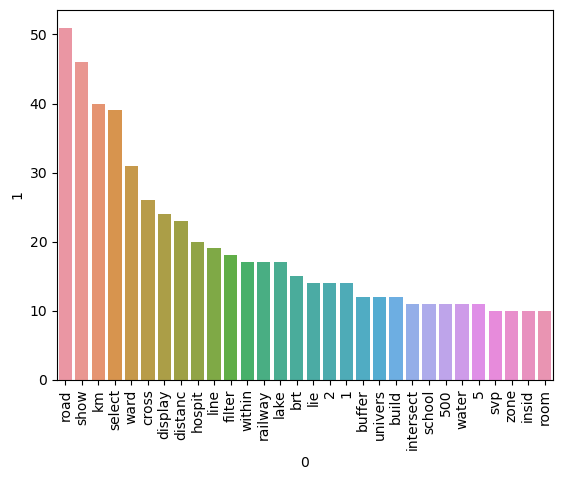

In [57]:
# plot top 15 words 

sns.barplot(pd.DataFrame(Counter(spatial_corpus).most_common(30))[0],pd.DataFrame(Counter(spatial_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [58]:
# loop for extract spatial & Attribute words

spa_nd_attri_corpus = []

for msg in df[df['target'] == 2]['transformed_text'].tolist():
    for word in msg.split():
        spa_nd_attri_corpus.append(word)

In [59]:
len(spa_nd_attri_corpus)

820

In [60]:
# Count Of spa_nd_attri Words

from collections import Counter
Counter(spa_nd_attri_corpus).most_common()

[('road', 55),
 ('distanc', 29),
 ('show', 22),
 ('km', 21),
 ('ward', 18),
 ('main', 18),
 ('500', 17),
 ('line', 16),
 ('school', 16),
 ('railway', 15),
 ('primari', 13),
 ('within', 13),
 ('lie', 13),
 ('hospit', 12),
 ('stop', 12),
 ('less', 12),
 ('1', 12),
 ('display', 11),
 ('major', 11),
 ('list', 11),
 ('2', 10),
 ('bu', 10),
 ('fire', 9),
 ('greater', 9),
 ('secondari', 8),
 ('area', 8),
 ('100', 8),
 ('meter', 8),
 ('pipe', 8),
 ('500m', 7),
 ('station', 7),
 ('build', 7),
 ('type', 7),
 ('1km', 6),
 ('zone', 6),
 ('traffic', 6),
 ('signal', 6),
 ('width', 6),
 ('lake', 6),
 ('case', 6),
 ('diamet', 6),
 ('10', 6),
 ('cross', 6),
 ('close', 6),
 ('cept', 5),
 ('univers', 5),
 ('intersect', 5),
 ('insid', 5),
 ('pg', 5),
 ('filter', 5),
 ('water', 5),
 ('700', 5),
 ('found', 5),
 ('path', 5),
 ('buffer', 4),
 ('privat', 4),
 ('100m', 4),
 ('brt', 4),
 ('200', 4),
 ('away', 4),
 ('shahibaug', 4),
 ('svp', 4),
 ('room', 4),
 ('restaur', 4),
 ('nation', 3),
 ('also', 3),
 ('boy'

In [61]:
pd.DataFrame(Counter(spa_nd_attri_corpus).most_common())

,0,1
0,road,55
1,distanc,29
2,show,22
3,km,21
4,ward,18
...,...,...
180,vjorpur,1
181,ars,1
182,neighborhood,1
183,rout,1


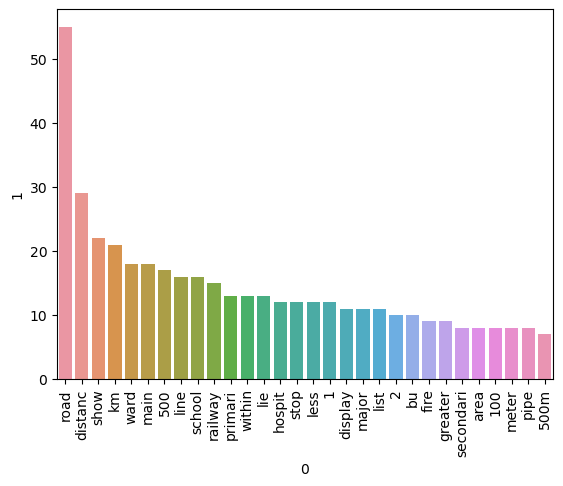

In [62]:
# plot top 15 words 

sns.barplot(pd.DataFrame(Counter(spa_nd_attri_corpus).most_common(30))[0],pd.DataFrame(Counter(spa_nd_attri_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

# Text Vectorization

### Bag Of Words

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [83]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [84]:
X.shape

(562, 438)

In [85]:
y = df['target'].values 

In [86]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
# train_test_split data for model tranning

from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### We use Naive Bayes Algorithm Like GaussianNB,MultinomialNB,BernoulliNB

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [94]:
# GaussianNB

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))

0.8584070796460177
[[45  1  7]
 [ 0 32  5]
 [ 0  3 20]]
0.8379629629629629


In [95]:
# MultinomialNB

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='macro'))

0.8761061946902655
[[46  1  6]
 [ 0 36  1]
 [ 2  4 17]]
0.8482384823848239


In [96]:
# BernoulliNB


bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='macro'))

0.8849557522123894
[[51  0  2]
 [ 1 36  0]
 [ 2  8 13]]
0.8764309764309764


# Use TFIDF For Text Vectorization

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(562, 438)

In [66]:
y = df['target'].values

In [67]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [73]:
# GaussianNB

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))

0.8407079646017699
[[45  1  7]
 [ 0 31  6]
 [ 0  4 19]]
0.8182870370370371


In [74]:
# MultinomialNB

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='macro'))

0.8849557522123894
[[51  0  2]
 [ 2 35  0]
 [ 3  6 14]]
0.8797909407665504


In [75]:
# BernoulliNB

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='macro'))

0.8849557522123894
[[51  0  2]
 [ 1 36  0]
 [ 2  8 13]]
0.8764309764309764


# Use All Multi-Classification ML Models

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [80]:
# Define a function to train a classifier and calculate accuracy and precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    return accuracy, precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8849557522123894, 0.8644133644133646)

In [82]:
clfs

{'SVC': SVC(gamma=1.0, kernel='sigmoid'),
 'KN': KNeighborsClassifier(),
 'NB': MultinomialNB(),
 'DT': DecisionTreeClassifier(max_depth=5),
 'LR': LogisticRegression(penalty='l1', solver='liblinear'),
 'RF': RandomForestClassifier(n_estimators=50, random_state=2),
 'AdaBoost': AdaBoostClassifier(random_state=2),
 'BgC': BaggingClassifier(n_estimators=50, random_state=2),
 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
 'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=

In [83]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    
    return accuracy,precision

In [84]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8849557522123894, 0.8644133644133646)

In [85]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.8495575221238938, 0.8208015708015708)

In [86]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.8849557522123894, 0.8797909407665504)

In [87]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.672566371681416, 0.8263571790969051)

In [88]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.8053097345132744, 0.7857697857697857)

In [89]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9380530973451328, 0.9361244019138756)

In [90]:
train_classifier(abc,X_train,y_train,X_test,y_test)

(0.8053097345132744, 0.7896737115313311)

In [91]:
train_classifier(bc,X_train,y_train,X_test,y_test)

(0.9292035398230089, 0.9130511463844798)

In [92]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(0.9734513274336283, 0.9762833008447043)

In [93]:
train_classifier(gbdt,X_train,y_train,X_test,y_test)

(0.9203539823008849, 0.9023484637519726)

In [94]:
train_classifier(xgb,X_train,y_train,X_test,y_test)

(0.9203539823008849, 0.8984725965858041)

In [95]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8849557522123894
Precision -  0.8644133644133646
For  KN
Accuracy -  0.8495575221238938
Precision -  0.8208015708015708
For  NB
Accuracy -  0.8849557522123894
Precision -  0.8797909407665504
For  DT
Accuracy -  0.672566371681416
Precision -  0.7800608828006088
For  LR
Accuracy -  0.8053097345132744
Precision -  0.7857697857697857
For  RF
Accuracy -  0.9380530973451328
Precision -  0.9361244019138756
For  AdaBoost
Accuracy -  0.8053097345132744
Precision -  0.7896737115313311
For  BgC
Accuracy -  0.9292035398230089
Precision -  0.9130511463844798
For  ETC
Accuracy -  0.9734513274336283
Precision -  0.9762833008447043
For  GBDT
Accuracy -  0.9203539823008849
Precision -  0.9023484637519726
For  xgb
Accuracy -  0.9203539823008849
Precision -  0.8984725965858041


In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [97]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.973451,0.976283
5,RF,0.938053,0.936124
7,BgC,0.929204,0.913051
9,GBDT,0.920354,0.902348
10,xgb,0.920354,0.898473
2,NB,0.884956,0.879791
0,SVC,0.884956,0.864413
1,KN,0.849558,0.820802
6,AdaBoost,0.805310,0.789674
4,LR,0.805310,0.785770


In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.973451
1,RF,Accuracy,0.938053
2,BgC,Accuracy,0.929204
3,GBDT,Accuracy,0.920354
4,xgb,Accuracy,0.920354
5,NB,Accuracy,0.884956
6,SVC,Accuracy,0.884956
7,KN,Accuracy,0.849558
8,AdaBoost,Accuracy,0.805310
9,LR,Accuracy,0.805310


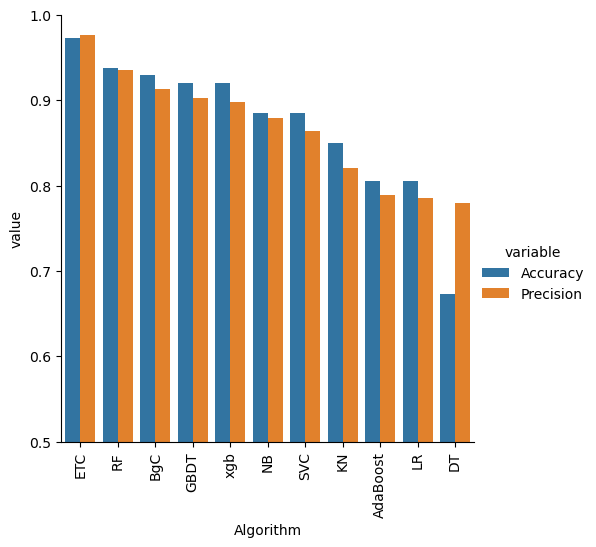

In [111]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

## Change the max_features parameter of TfIdf

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=350)

In [122]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [123]:
X.shape

(562, 350)

In [124]:
y = df['target'].values

In [125]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [128]:
# BernoulliNB

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='macro'))

0.9292035398230089
[[51  0  2]
 [ 0 37  0]
 [ 2  4 17]]
0.9198133391463011


In [129]:
# GaussianNB

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))

0.8495575221238938
[[45  1  7]
 [ 0 32  5]
 [ 0  4 19]]
0.8259226968904388


In [130]:
# MultinomialNB

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='macro'))

0.8849557522123894
[[51  0  2]
 [ 2 35  0]
 [ 3  6 14]]
0.8797909407665504


In [131]:
#!pip install threadpoolctl==3.1.0


In [132]:
#pip show --files threadpoolctl


In [133]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    
    return accuracy,precision

In [134]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8938053097345132
Precision -  0.8771626696154998
For  KN
Accuracy -  0.831858407079646
Precision -  0.8037472766884531
For  NB
Accuracy -  0.8849557522123894
Precision -  0.8797909407665504
For  DT
Accuracy -  0.6814159292035398
Precision -  0.8356164383561643
For  LR
Accuracy -  0.8141592920353983
Precision -  0.7916177908113392
For  RF
Accuracy -  0.9380530973451328
Precision -  0.9382832080200502
For  AdaBoost
Accuracy -  0.7168141592920354
Precision -  0.6794745484400657
For  BgC
Accuracy -  0.9734513274336283
Precision -  0.9696666363333031
For  ETC
Accuracy -  0.9646017699115044
Precision -  0.9681861348528016
For  GBDT
Accuracy -  0.8672566371681416
Precision -  0.8402143466082084
For  xgb
Accuracy -  0.9469026548672567
Precision -  0.939845661584792


# Voting Classifier

In [135]:
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [136]:
voting = VotingClassifier(estimators=[('BgC', bc), ('xgb', xgb), ('et', etc)],voting='soft')

In [137]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            imp...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=2, ...)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [138]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,average='macro'))

Accuracy 0.9557522123893806
Precision 0.9463231347289319


# Applying stacking

In [ ]:
estimators=[('BgC', bc), ('xgb', xgb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [139]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,average='macro'))

Accuracy 0.9469026548672567
Precision 0.939845661584792


# Let's do some hyperparameter Tunning For My Models

In [141]:
from sklearn.model_selection import cross_val_score

def cross_validate_models(models, X, y, cv=5, scoring='accuracy'):
    """
    Apply cross-validation to a list of machine learning models and return a dictionary of scores.
    
    Parameters:
    models (list): A list of machine learning models.
    X (array-like): The feature matrix.
    y (array-like): The target variable.
    cv (int or cross-validation generator, optional): The number of folds or cross-validation generator. Default is 5.
    scoring (string, callable, list/tuple or dict, optional): The scoring metric. Default is 'accuracy'.
    
    Returns:
    scores (dict): A dictionary of scores for each model.
    """
    
    scores = {}
    
    for model in models:
        name = model.__class__.__name__
        print(f"Evaluating {name}...")
        score = cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
        scores[name] = score
        
    return scores


In [143]:
models = [SVC(kernel='sigmoid', gamma=1.0),
          KNeighborsClassifier(),
          MultinomialNB(),
          DecisionTreeClassifier(max_depth=5),
          LogisticRegression(solver='liblinear', penalty='l1'),
          RandomForestClassifier(n_estimators=50, random_state=2),
          AdaBoostClassifier(n_estimators=50, random_state=2),
          BaggingClassifier(n_estimators=50, random_state=2),
          ExtraTreesClassifier(n_estimators=50, random_state=2),
          GradientBoostingClassifier(n_estimators=50,random_state=2),
          XGBClassifier(n_estimators=50,random_state=2)]

scores = cross_validate_models(models, X, y, cv=5, scoring='precision')
print(scores)


Evaluating SVC...
Evaluating KNeighborsClassifier...
Evaluating MultinomialNB...
Evaluating DecisionTreeClassifier...
Evaluating LogisticRegression...
Evaluating RandomForestClassifier...
Evaluating AdaBoostClassifier...
Evaluating BaggingClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating XGBClassifier...
{'SVC': nan, 'KNeighborsClassifier': nan, 'MultinomialNB': nan, 'DecisionTreeClassifier': nan, 'LogisticRegression': nan, 'RandomForestClassifier': nan, 'AdaBoostClassifier': nan, 'BaggingClassifier': nan, 'ExtraTreesClassifier': nan, 'GradientBoostingClassifier': nan, 'XGBClassifier': nan}


In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

def cross_validate_models(models, X, y, cv=5):
    """
    Apply cross-validation to a list of machine learning models and return a dictionary of precision scores.
    
    Parameters:
    models (list): A list of machine learning models.
    X (array-like): The feature matrix.
    y (array-like): The target variable.
    cv (int or cross-validation generator, optional): The number of folds or cross-validation generator. Default is 5.
    
    Returns:
    scores (dict): A dictionary of precision scores for each model.
    """
    
    scoring = make_scorer(precision_score, average='macro')
    scores = {}
    
    for model in models:
        name = model.__class__.__name__
        print(f"Evaluating {name}...")
        score = cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
        scores[name] = score
        
    return scores


In [150]:
models = [SVC(kernel='sigmoid', gamma=1.0),
          KNeighborsClassifier(),
          MultinomialNB(),
          DecisionTreeClassifier(max_depth=5),
          LogisticRegression(solver='liblinear', penalty='l1'),
          RandomForestClassifier(n_estimators=50, random_state=2),
          AdaBoostClassifier(n_estimators=50, random_state=2),
          BaggingClassifier(n_estimators=50, random_state=2),
          ExtraTreesClassifier(n_estimators=50, random_state=2),
          GradientBoostingClassifier(n_estimators=50,random_state=2),
          XGBClassifier(n_estimators=50,random_state=2)]
          
            
    

scores = cross_validate_models(models, X, y, cv=5)
print(scores)


Evaluating SVC...
Evaluating KNeighborsClassifier...
Evaluating MultinomialNB...
Evaluating DecisionTreeClassifier...
Evaluating LogisticRegression...
Evaluating RandomForestClassifier...
Evaluating AdaBoostClassifier...
Evaluating BaggingClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GradientBoostingClassifier...
Evaluating XGBClassifier...
{'SVC': 0.9161822187327264, 'KNeighborsClassifier': 0.8260039471103493, 'MultinomialNB': 0.8965633083677303, 'DecisionTreeClassifier': 0.7094031924888113, 'LogisticRegression': 0.7947683150445921, 'RandomForestClassifier': 0.9090583009377788, 'AdaBoostClassifier': 0.7553143486493724, 'BaggingClassifier': 0.8959756847896836, 'ExtraTreesClassifier': 0.9404628148392138, 'GradientBoostingClassifier': 0.8732705538503011, 'XGBClassifier': 0.8480007567879255}


In [ ]:
#import pickle
#pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#pickle.dump(mnb,open('model.pkl','wb'))